In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mental = pd.read_csv('C:\\Users\\elena\\mental_health_dataset.csv')


,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [29]:
mental.describe()


,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.89200,7.095600,54.621000,5.134000
std,288.819436,13.97475,1.713861,14.709035,3.081808
min,1.000000,18.00000,4.000000,30.000000,0.000000
25%,250.750000,30.00000,5.600000,42.000000,3.000000
50%,500.500000,42.00000,7.100000,55.000000,5.000000
75%,750.250000,54.00000,8.500000,67.000000,8.000000
max,1000.000000,65.00000,10.000000,80.000000,10.000000


In [47]:
mental = pd.get_dummies(mental, columns=['Stress_Level'], drop_first=False)



In [51]:
# Групування за професією та розрахунок середніх значень для кожного рівня стресу
occupation_stress_levels = mental.groupby('Occupation')[['Stress_Level_Low', 'Stress_Level_Medium', 'Stress_Level_High']].mean()
print(occupation_stress_levels)


             Stress_Level_Low  Stress_Level_Medium  Stress_Level_High
Occupation                                                           
Education            0.362963             0.288889           0.348148
Engineering          0.317568             0.317568           0.364865
Finance              0.338129             0.338129           0.323741
Healthcare           0.355705             0.315436           0.328859
IT                   0.300752             0.360902           0.338346
Other                0.329193             0.304348           0.366460
Sales                0.362963             0.318519           0.318519


In [53]:
# Групування за професією та обчислення середніх годин сну та роботи
occupation_sleep_work = mental.groupby('Occupation')[['Sleep_Hours', 'Work_Hours']].mean()
print(occupation_sleep_work)


             Sleep_Hours  Work_Hours
Occupation                          
Education       7.154815   54.940741
Engineering     7.148649   54.398649
Finance         7.081295   55.330935
Healthcare      6.924161   53.577181
IT              7.048872   56.127820
Other           7.244099   55.453416
Sales           7.051111   52.488889


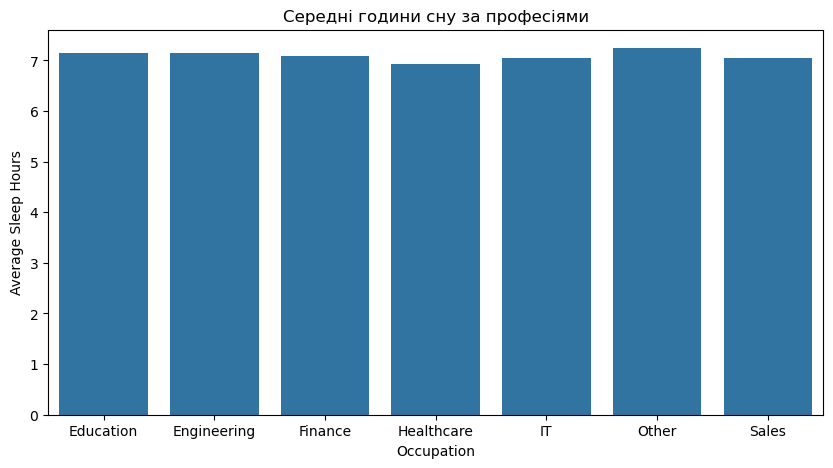

In [55]:
# Візуалізація середніх годин сну для кожної професії
plt.figure(figsize=(10, 5))
sns.barplot(x=occupation_sleep_work.index, y=occupation_sleep_work['Sleep_Hours'])
plt.title("Середні години сну за професіями")
plt.xlabel("Occupation")
plt.ylabel("Average Sleep Hours")
plt.show()


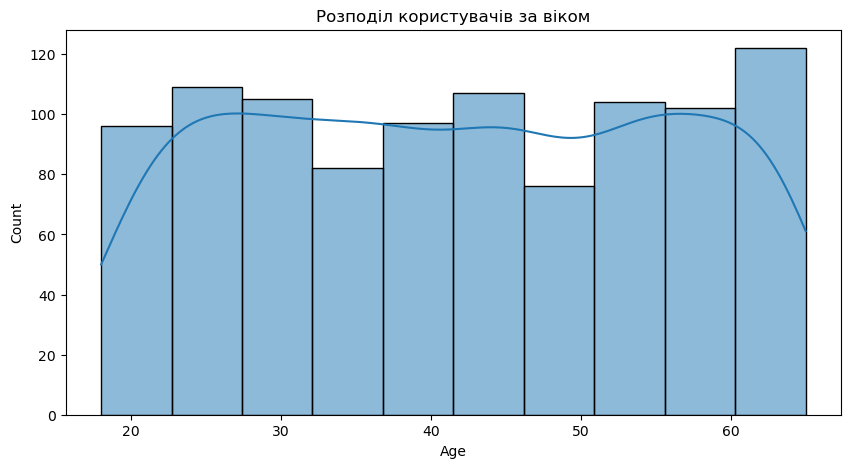

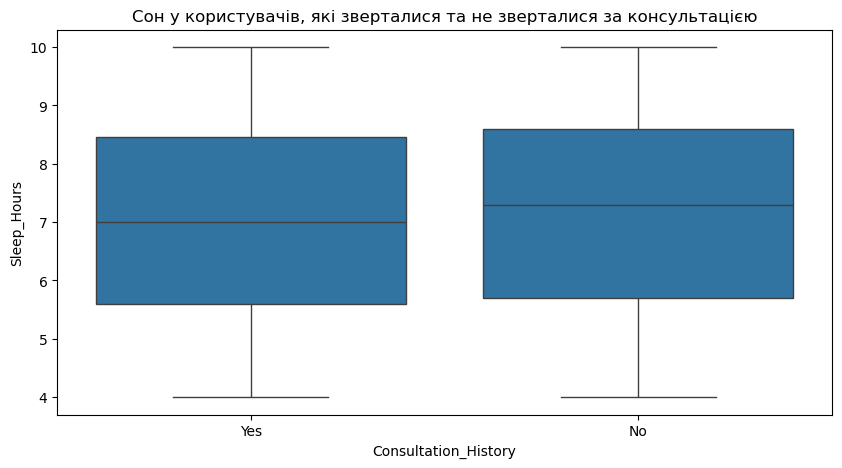

In [65]:
# Розподіл вікових груп
plt.figure(figsize=(10, 5))
sns.histplot(mental['Age'], bins=10, kde=True)
plt.title("Розподіл користувачів за віком")
plt.show()

# Гістограма для середніх годин сну
plt.figure(figsize=(10, 5))
sns.boxplot(x='Consultation_History', y='Sleep_Hours', data=mental)
plt.title("Сон у користувачів, які зверталися та не зверталися за консультацією")
plt.show()